In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
diamonds = pd.read_csv('../data/diamonds_train.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


### THE PROBLEM

Understanding the dataset, I'm going to study the meaning and relevance of each variable with respect to the problem, objectively responding to:
- The relevance of the price in the purchase of a diamond
- The importance of the variable price
- Overlap with others

#### Information about diamonds
see the next website: https://www.bluenile.com/education/diamonds

- Carat: The term carat actually refers to the diamond's total weight and not its size.
- Cut: The most important of the 4Cs is cut because it has the greatest influence on a diamond's sparkle.
- Color: The second most important of the 4Cs is color, which refers to a diamond's lack of color. The less color, the higher the grade.
- Clarity: Often the least important of the 4Cs because the tiny imperfections are often microscopic.
- Depth: The height of a gemstone measured from the culet to the table
- Table: The largest facet of a gemstone

### Basic analysis
First approach with the data

#### Get data types

In [3]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

#### Get statistics data

In [4]:
diamonds.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,40455.000000,40455,40455,40455,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16220,8455,9749,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797706,NaN,NaN,NaN,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,NaN,NaN,NaN,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000


##### Categorical variables

In [5]:
cat_var = diamonds.select_dtypes(exclude=['float','int'])
cat_var.head()

,cut,color,clarity
0,Premium,J,VS2
1,Very Good,H,VS2
2,Fair,G,VS1
3,Good,D,SI1
4,Ideal,G,SI1


##### Numerical variables

In [6]:
num_var = diamonds.select_dtypes(exclude='object')
num_var.head()

,carat,depth,table,price,x,y,z
0,1.21,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,63.0,57.0,505,4.35,4.38,2.75
2,0.71,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,63.8,56.0,738,4.68,4.72,3.00
4,1.02,60.5,59.0,4882,6.55,6.51,3.95


#### Operations with numerical variables

###### TOP10 of diamonds per each variable

- Carat weight feature

In [7]:
Top10_diamonds_by_carat = diamonds.sort_values(by='carat', ascending=False).head(10)
Top10_diamonds_by_carat

,carat,cut,color,clarity,depth,table,price,x,y,z
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27893,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
23609,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
21513,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
35525,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
20432,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27
18660,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85
25447,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92


In [8]:
# The peak value
diamonds.loc[num_var.carat.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
31083,4.5,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


- depth feature

In [9]:
Top10_diamonds_by_depth = diamonds.sort_values(by='depth', ascending=False).head(10)
Top10_diamonds_by_depth

,carat,cut,color,clarity,depth,table,price,x,y,z
25248,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
17770,0.99,Fair,J,I1,73.6,60.0,1789,6.01,5.80,4.35
35969,0.90,Fair,G,SI1,72.9,54.0,2691,5.74,5.67,4.16
11967,0.96,Fair,G,SI2,72.2,56.0,2438,6.01,5.81,4.28
37042,1.02,Fair,H,VS1,71.8,56.0,4455,6.04,5.97,4.31
2690,0.70,Fair,D,SI2,71.6,55.0,1696,5.47,5.28,3.85
35347,1.50,Fair,I,I1,71.3,58.0,4368,6.85,6.81,4.87
14898,0.50,Fair,F,I1,71.0,57.0,613,4.87,4.79,3.43
5600,0.70,Fair,F,I1,70.8,56.0,992,5.38,5.33,3.79
22813,0.73,Fair,I,I1,70.8,55.0,1049,5.51,5.34,3.84


In [10]:
# The peak value
diamonds.loc[num_var.depth.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
25248,0.5,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


- table feature

In [11]:
Top10_diamonds_by_table = diamonds.sort_values(by='table', ascending=False).head(10)
Top10_diamonds_by_table

,carat,cut,color,clarity,depth,table,price,x,y,z
21603,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87
22030,0.81,Fair,F,SI2,68.8,79.0,2301,5.26,5.20,3.58
13278,0.79,Fair,G,SI1,65.3,76.0,2362,5.52,5.13,3.35
25248,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
6049,0.70,Fair,H,VS1,62.0,73.0,2100,5.65,5.54,3.47
11186,0.71,Fair,D,VS2,55.6,73.0,2368,6.01,5.96,3.33
32505,1.51,Fair,E,SI1,58.4,70.0,11102,7.55,7.39,4.36
6237,0.67,Fair,I,VS2,57.2,70.0,1436,5.82,5.75,3.31
24512,0.56,Fair,H,VS2,52.7,70.0,1293,5.71,5.57,2.97
40022,0.76,Fair,G,VS1,59.0,70.0,2800,5.89,5.80,3.46


In [12]:
# The peak value
diamonds.loc[num_var.table.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
21603,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


- price feature

In [13]:
Top10_diamonds_by_price = diamonds.sort_values(by='price', ascending=False).head(10)
Top10_diamonds_by_price

,carat,cut,color,clarity,depth,table,price,x,y,z
7034,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
3990,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
29107,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
25529,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
618,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
6912,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
11427,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70
34658,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21
13839,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.00
31694,2.05,Ideal,G,SI1,61.9,57.0,18787,8.10,8.16,5.03


In [14]:
# The peak value
diamonds.loc[num_var.price.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
7034,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


- 'x' dimension feature

In [15]:
Top10_diamonds_by_x = diamonds.sort_values(by='x', ascending=False).head(10)
Top10_diamonds_by_x

,carat,cut,color,clarity,depth,table,price,x,y,z
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
23609,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
27893,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
21513,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
35525,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
6033,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
10127,3.04,Premium,I,SI2,59.3,60.0,18559,9.51,9.46,5.62
25447,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92


In [16]:
# The peak value
diamonds.loc[num_var.x.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
31083,4.5,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


- 'y' dimension feature

In [17]:
Top10_diamonds_by_y = diamonds.sort_values(by='y', ascending=False).head(10)
Top10_diamonds_by_y

,carat,cut,color,clarity,depth,table,price,x,y,z
14708,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
23609,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
27893,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
21513,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
35525,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
10127,3.04,Premium,I,SI2,59.3,60.0,18559,9.51,9.46,5.62
25447,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92


In [18]:
# The peak value
diamonds.loc[num_var.y.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
14708,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


- 'z' dimension feature

In [19]:
Top10_diamonds_by_z = diamonds.sort_values(by='z', ascending=False).head(10)
Top10_diamonds_by_z

,carat,cut,color,clarity,depth,table,price,x,y,z
14708,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27893,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
2884,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
20432,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27
23609,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
33758,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16
35525,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
21513,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


In [20]:
# The peak value
diamonds.loc[num_var.z.idxmax():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
14708,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


###### 10 tail ends of diamonds per each variable

- Carat weight feature

In [21]:
tailends10_diamonds_by_carat = diamonds.sort_values(by='carat', ascending=True).head(10)
tailends10_diamonds_by_carat

,carat,cut,color,clarity,depth,table,price,x,y,z
6423,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
1582,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
6550,0.20,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28
16597,0.20,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30
5157,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
23007,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
30347,0.21,Premium,E,VS2,60.5,59.0,386,3.87,3.83,2.33
16677,0.21,Premium,E,SI2,61.9,56.0,394,3.84,3.82,2.37
33719,0.21,Premium,D,VS2,59.1,62.0,386,3.89,3.86,2.29
12903,0.21,Premium,E,VS2,59.6,56.0,386,3.93,3.89,2.33


In [22]:
# The bottom values
tailends10_diamonds_by_carat.head(6)

,carat,cut,color,clarity,depth,table,price,x,y,z
6423,0.2,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
1582,0.2,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
6550,0.2,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28
16597,0.2,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30
5157,0.2,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
23007,0.2,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33


- depth feature

In [23]:
tailends10_diamonds_by_depth = diamonds.sort_values(by='depth', ascending=True).head(10)
tailends10_diamonds_by_depth

,carat,cut,color,clarity,depth,table,price,x,y,z
242,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
30278,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
3205,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
33447,0.37,Fair,F,IF,52.3,61.0,1166,4.96,4.91,2.58
24512,0.56,Fair,H,VS2,52.7,70.0,1293,5.71,5.57,2.97
12020,0.98,Fair,E,SI2,53.3,67.0,2855,6.82,6.74,3.61
6044,0.73,Fair,F,SI2,53.4,65.0,2164,6.19,6.15,3.30
17446,1.08,Fair,E,SI1,53.8,63.0,4790,6.99,6.81,3.71
7212,0.34,Fair,E,VVS1,54.0,56.0,1012,4.80,4.76,2.58
6862,0.31,Fair,D,VVS2,54.2,65.0,997,4.61,4.58,2.49


In [24]:
# The bottom values
tailends10_diamonds_by_depth.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
242,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
30278,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12


- table feature

In [25]:
tailends10_diamonds_by_table = diamonds.sort_values(by='table', ascending=True).head(10)
tailends10_diamonds_by_table

,carat,cut,color,clarity,depth,table,price,x,y,z
2068,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
21300,0.29,Very Good,E,VS1,62.8,44.0,474,4.20,4.24,2.65
35759,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
18318,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
31827,1.02,Fair,F,SI1,61.8,50.0,4227,6.59,6.51,4.05
12200,2.00,Fair,H,SI1,61.2,50.0,13764,8.17,8.08,4.97
33406,0.94,Fair,H,SI2,66.0,50.1,3353,6.13,6.17,4.06
6434,0.37,Premium,F,VS1,62.7,51.0,833,4.65,4.57,2.89
25004,0.57,Good,H,VS1,63.7,51.0,1728,5.36,5.29,3.39
32909,0.51,Fair,E,VS2,65.5,51.0,1709,5.06,5.01,3.30


In [26]:
diamonds.loc[num_var.table.idxmin():].head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
2068,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04


- price feature

In [27]:
tailends10_diamonds_by_price = diamonds.sort_values(by='price', ascending=True).head(10)
tailends10_diamonds_by_price

,carat,cut,color,clarity,depth,table,price,x,y,z
18377,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
9782,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
18381,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
20968,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
12084,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
34740,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
31997,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
37354,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
29931,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
17300,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46


In [28]:
# The bottom values
tailends10_diamonds_by_price.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
18377,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
9782,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


- 'x' dimension feature

In [29]:
tailends10_diamonds_by_x = diamonds.sort_values(by='x', ascending=True).head(10)
tailends10_diamonds_by_x

,carat,cut,color,clarity,depth,table,price,x,y,z
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
14815,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
26192,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00
28029,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
34423,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
5157,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
6423,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
1582,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
23007,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
8984,0.21,Very Good,E,VS2,63.2,54.0,386,3.82,3.78,2.40


In [30]:
# The bottom values
tailends10_diamonds_by_x.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
14815,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
26192,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
28029,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
34423,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0


- 'y' dimension feature

In [31]:
tailends10_diamonds_by_y = diamonds.sort_values(by='y', ascending=True).head(10)
tailends10_diamonds_by_y

,carat,cut,color,clarity,depth,table,price,x,y,z
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
28029,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
34423,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
26192,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00
5157,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
1582,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
6423,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
23007,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
19587,0.21,Premium,D,VS2,61.6,59.0,386,3.82,3.78,2.34
8984,0.21,Very Good,E,VS2,63.2,54.0,386,3.82,3.78,2.40


In [32]:
# The bottom values
tailends10_diamonds_by_y.head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
28029,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
34423,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
26192,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0


- 'z' dimension feature

In [33]:
tailends10_diamonds_by_z = diamonds.sort_values(by='z', ascending=True).head(10)
tailends10_diamonds_by_z

,carat,cut,color,clarity,depth,table,price,x,y,z
24795,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
34601,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
14891,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
19856,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
26192,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.0
16425,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
28029,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
34423,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
3945,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0


### Advanced analysis

Second approach of data and focused on price variable

#### Correlation variables

General analysis to know the correlations between numerical variables

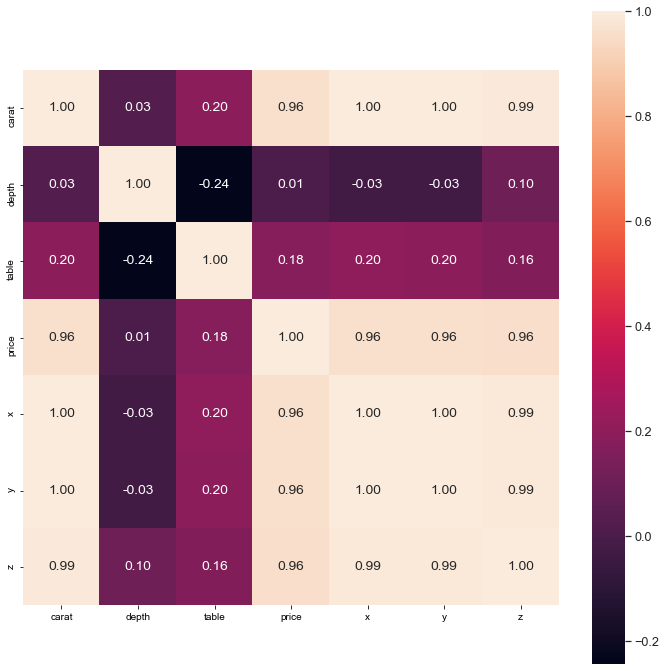

In [34]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)

sns.set(font_scale = 1.15)
sns.heatmap(diamonds.corr(method='spearman'), 
            cbar=True, 
            annot=True, 
            square=True, 
            fmt='.2f', 
            ax=ax);

In [35]:
corr = diamonds.corr()
corr[['price']].sort_values(by = 'price',ascending = False).style.background_gradient()

,price
price,1.000000
carat,0.921935
x,0.885848
z,0.874500
y,0.866163
table,0.130111
depth,-0.014864


I see that carat variable is strongly correlated, followed closely by other dimension variables as x, z and y. There isn't exist a correlation of price variable with the variables 'table' & 'depth'.

The following graph shows a scatter type correlation graph for each variable to visually have the correlations between variables. It shows different colours based on categorical variable named 'cut'.

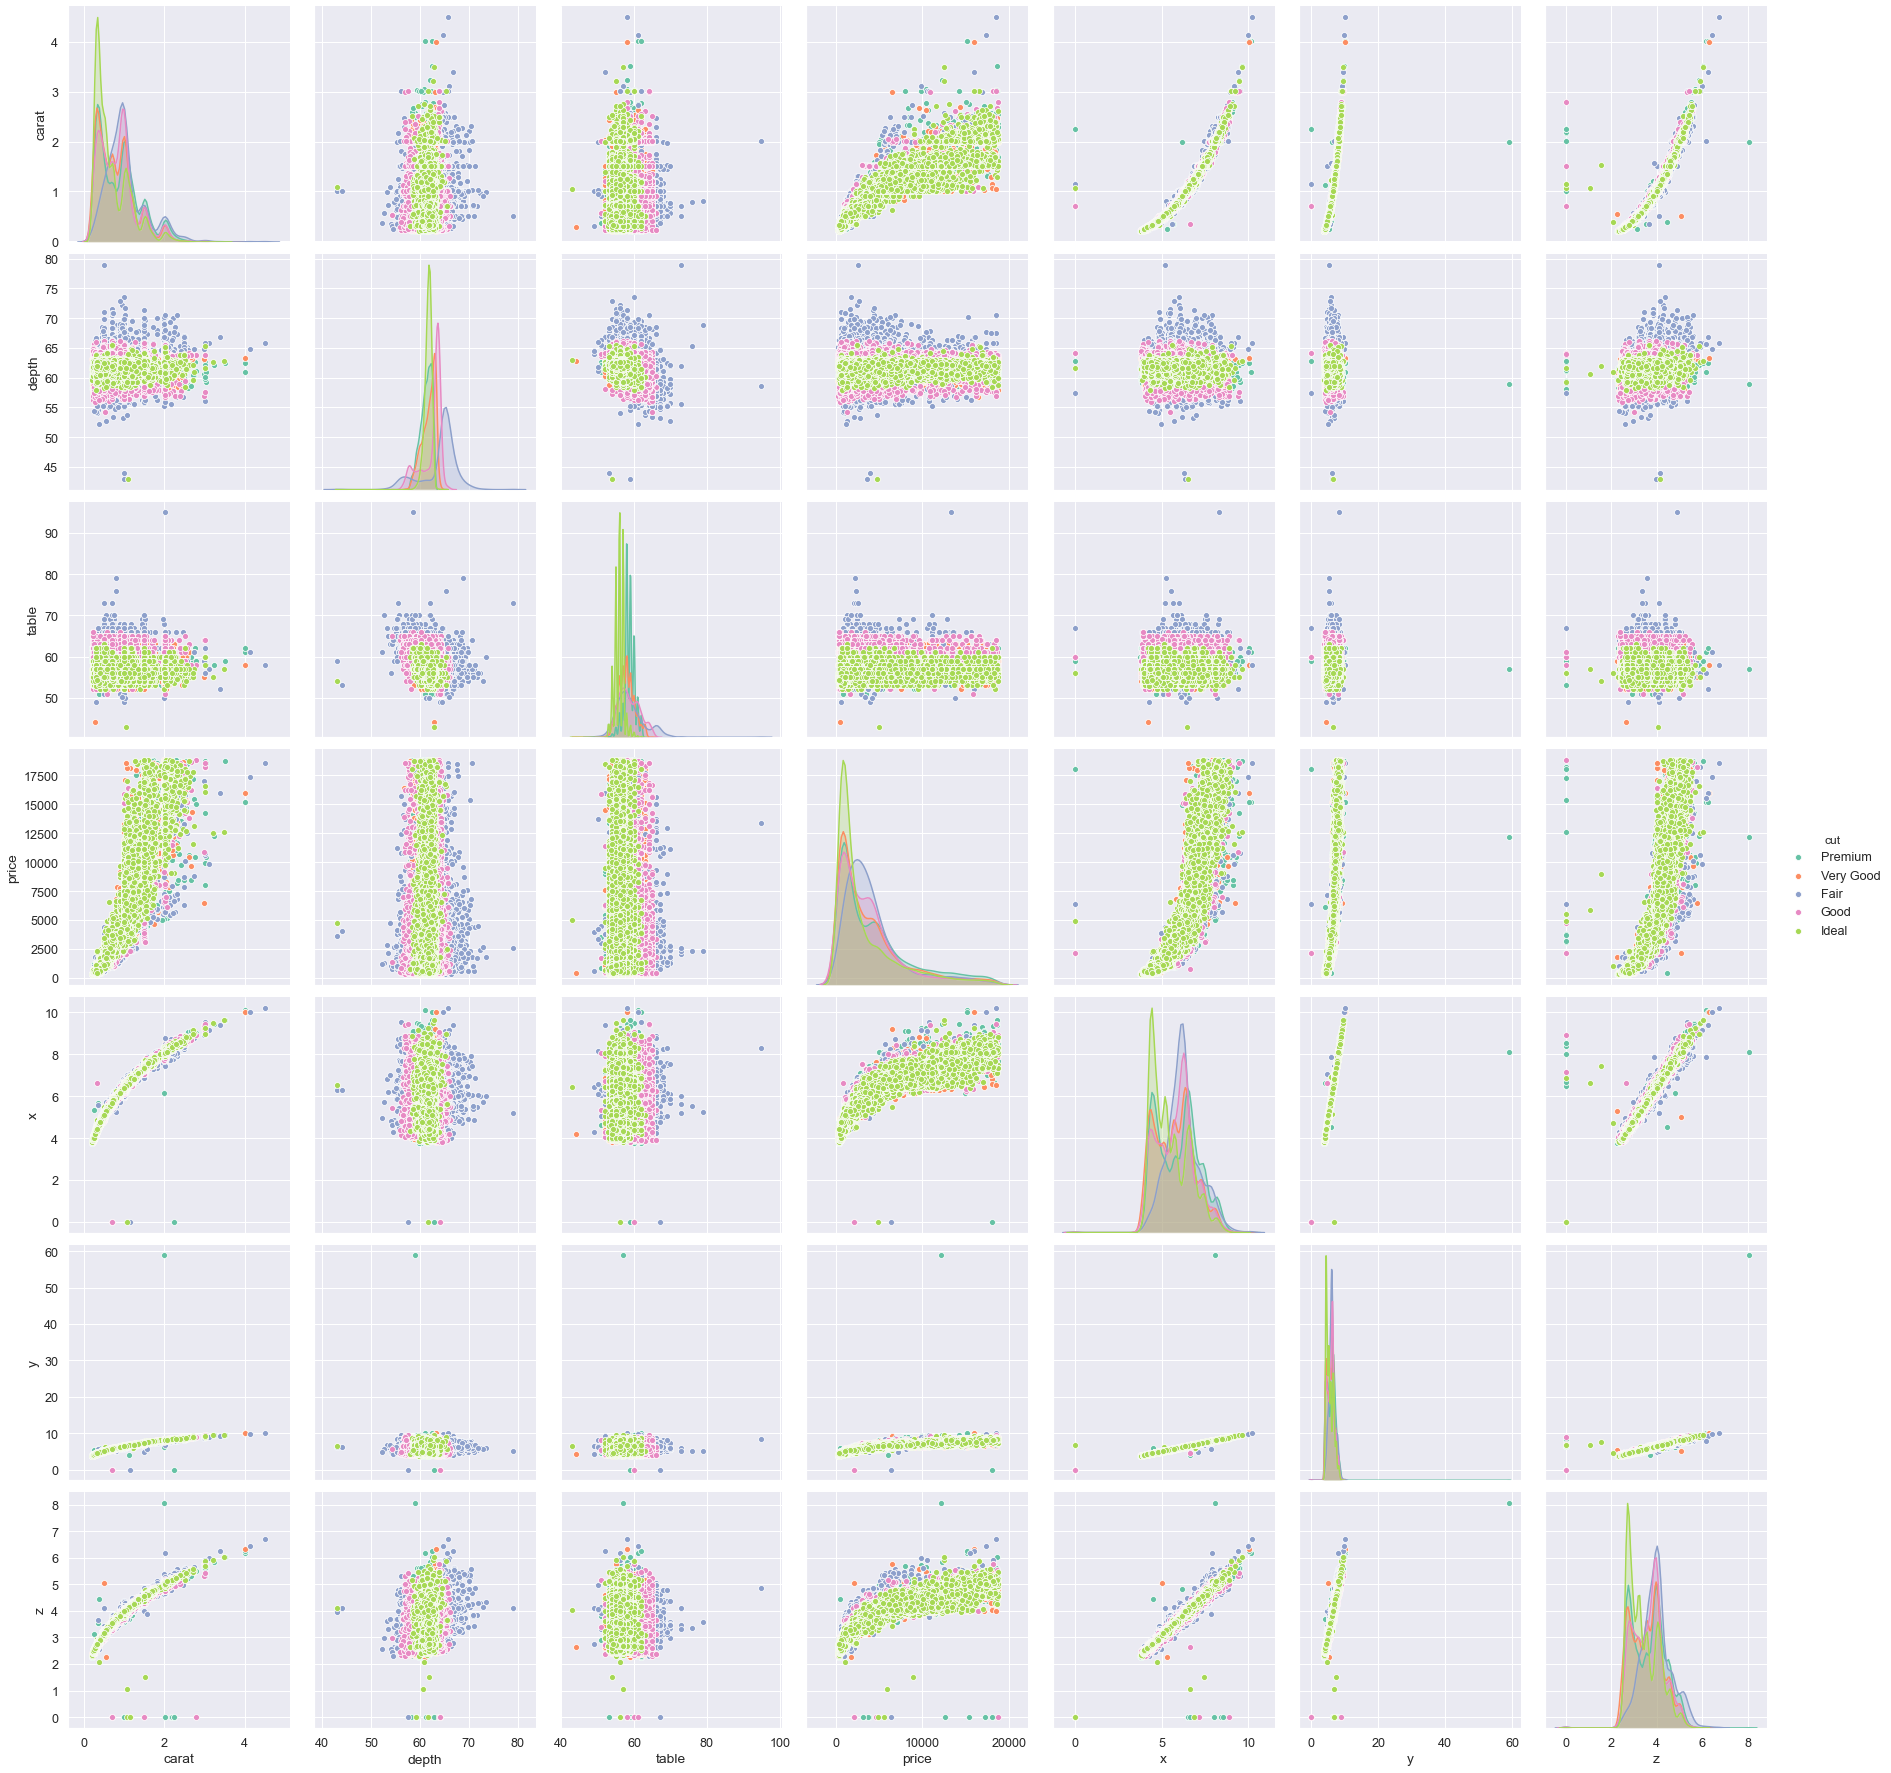

In [36]:
sns.pairplot(diamonds, hue='cut', palette='Set2', size=3.5)

#### Taking a look to the price variable

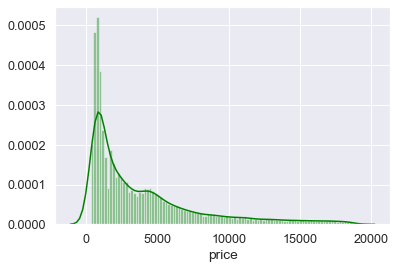

In [37]:
sns.distplot(diamonds['price'], bins=100, color='green')

whit this histogram plot of the price variable, I can see a deviation from the normal distribution, some peaks and a positive asymmetry

In order to have a confirm of data, the skew value should be positive and the kurtosis should have a heavier tails than the normal distribution. With this, I suppose that the majority of diamonds of dataset are cheaper than a few exclusive diamonds

In [38]:
print("Skewness: %f" % diamonds['price'].skew())
print("Kurtosis: %f" % diamonds['price'].kurt())

Skewness: 1.618838
Kurtosis: 2.175589


#### price variable vs correlative numerical variables

- carat weight

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


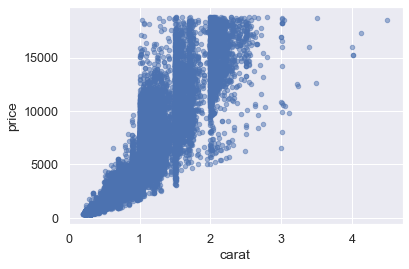

In [39]:
var = 'carat'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha = 0.5);

The carat weight variable maintains a positive linear relationship with price, increasing in the same direction. Higher price are related with carat weight greater than two and the lower price are related with carat weight lower than 1.

- dimension features 'x, y & z'

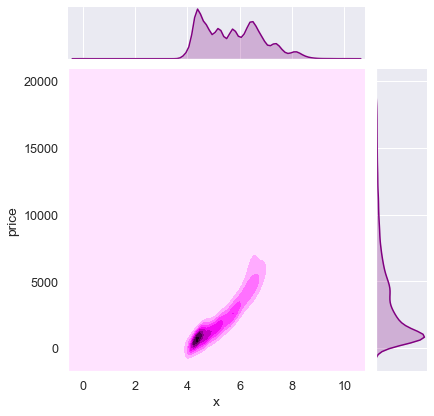

In [40]:
sns.jointplot(x='x', y='price', data=diamonds, kind='kde', color='purple')

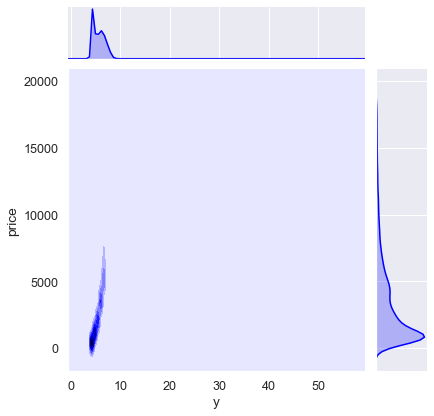

In [41]:
sns.jointplot(x='y', y='price', data=diamonds, kind='kde', color='blue')

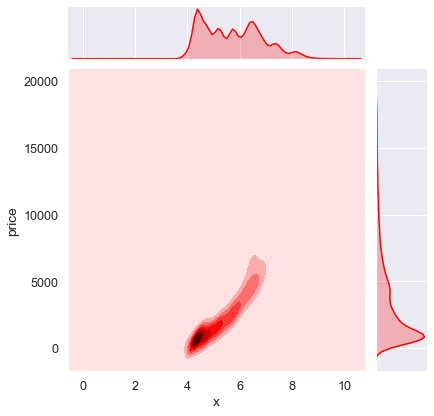

In [42]:
sns.jointplot(x='x', y='price', data=diamonds, kind='kde', color='red')

The slope of price between the variables 'x, y, z' is very steep with values between 4 and 10

#### price variable vs categorical variables

- cut variable

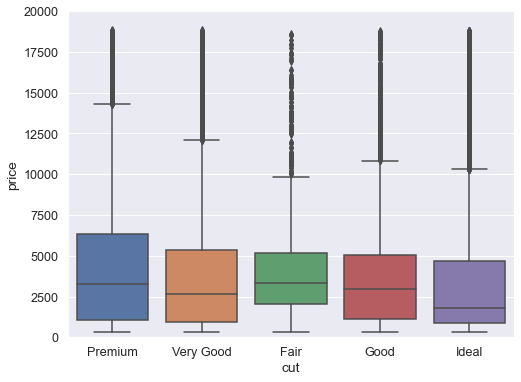

In [43]:
var = 'cut'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=20000);

This plot allows quick graphical examination of the dataset. Particularly useful for comparing distributions between categories of the cut variable. It is easy to recognize the minimum, maximum, median, the first quartile (means the median of the lower half of the dataset) and the third quartile (means the median of the upper half of the dataset)

- color variable

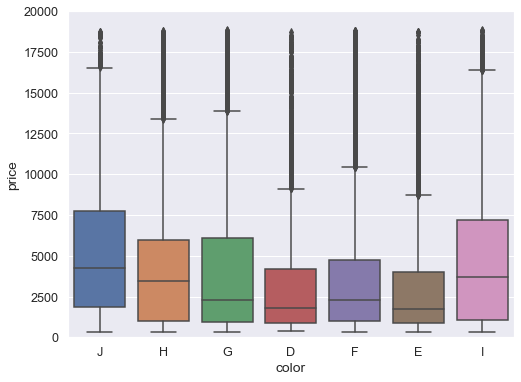

In [44]:
var = 'color'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=20000);

Same case, I recognize the most important values between price and color variable. In the next plot I combine two categorical variables with price:

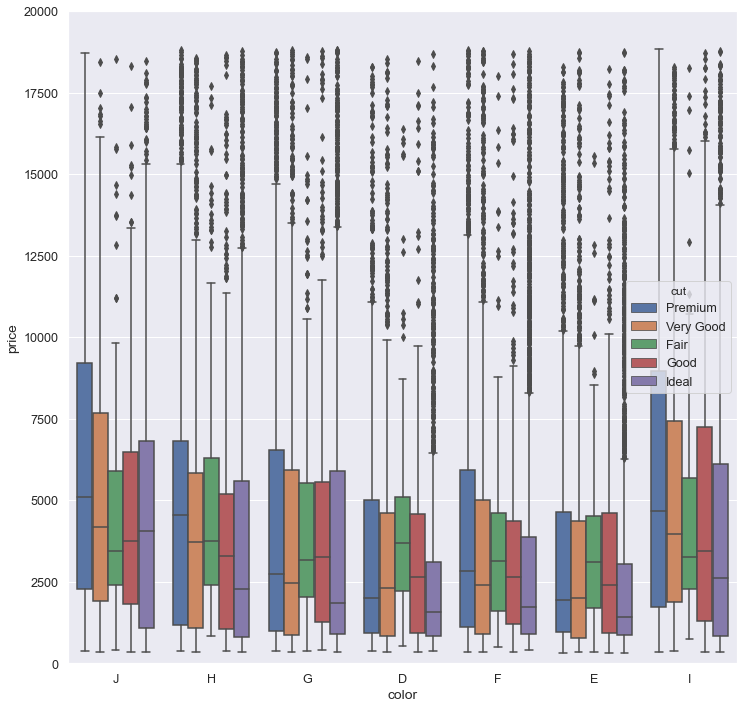

In [45]:
var = 'color'
f, ax = plt.subplots(figsize=(12, 12))
fig = sns.boxplot(x=var, y="price", data=diamonds, hue='cut')
fig.axis(ymin=0, ymax=20000);

Taking a look, I see a comparative boxplot showing the price according to the features of cut & color. Higher price features corresponds to the cut "Premium" and the colour "J"

- clarity variable

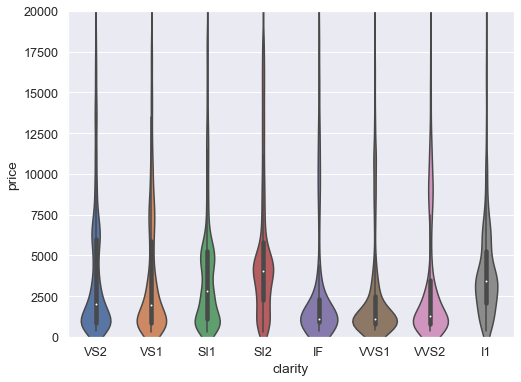

In [46]:
var = 'clarity'
data = pd.concat([diamonds['price'], diamonds[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.violinplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=20000);

Changing the plot, I see more or less the same values of boxplot but the main difference is the density according to clarity categorical value 

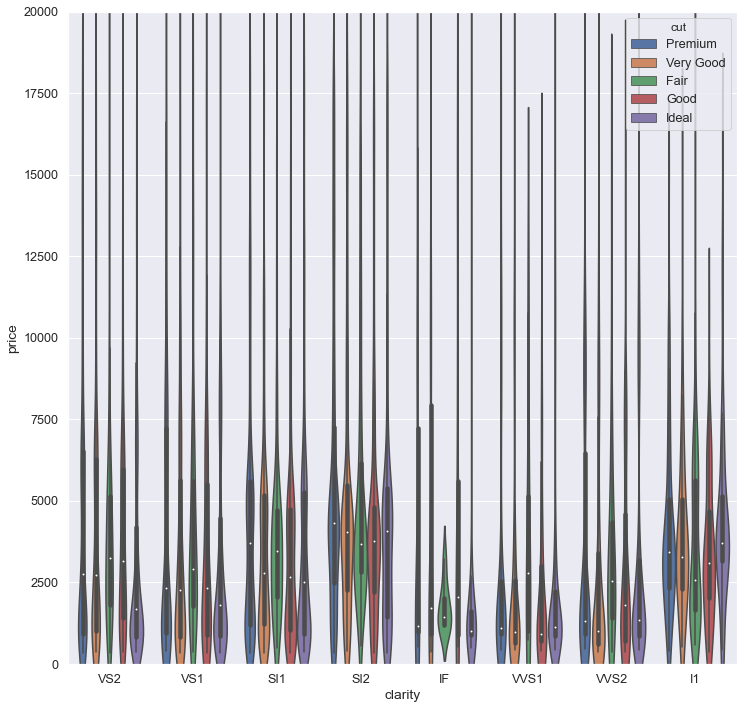

In [47]:
var = 'clarity'
f, ax = plt.subplots(figsize=(12, 12))
fig = sns.violinplot(x=var, y="price", data=diamonds, hue='cut')
fig.axis(ymin=0, ymax=20000);

It is not easy to see the distribution with this plot when I combine two categorical variables.

#### Review basic stats

In [48]:
diamonds.mean()

carat       0.797706
depth      61.752841
table      57.446133
price    3928.444469
x           5.729392
y           5.732819
z           3.537154
dtype: float64

In [49]:
diamonds.std()

carat       0.475544
depth       1.431725
table       2.233535
price    3992.416147
x           1.124453
y           1.146650
z           0.697062
dtype: float64

In [50]:
diamonds.quantile(.25)

carat      0.40
depth     61.00
table     56.00
price    945.00
x          4.71
y          4.72
z          2.91
Name: 0.25, dtype: float64

In [51]:
diamonds.median()

carat       0.70
depth      61.80
table      57.00
price    2397.00
x           5.69
y           5.71
z           3.52
dtype: float64

In [52]:
diamonds.quantile(.75)

carat       1.040
depth      62.500
table      59.000
price    5331.000
x           6.540
y           6.540
z           4.035
Name: 0.75, dtype: float64